# 타이타닉

### 데이터 불러오기

In [ ]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

- 처리의 용이성을 위해 두 데이터 프레임을 합친다.

In [ ]:
data = pd.concat((train_df, test_df))
# 인덱스를 다시 초기화  해준다.
data.reset_index(drop=True, inplace=True)
data

### countplot
- 결측치를 제외하고 데이터가 같은 것 끼리 그룹으로 묶어 그 수를 구해 그래프로
- 그린다.
- x = 수를 계산할 컬럼
- hue = 결과데이터 컬럼

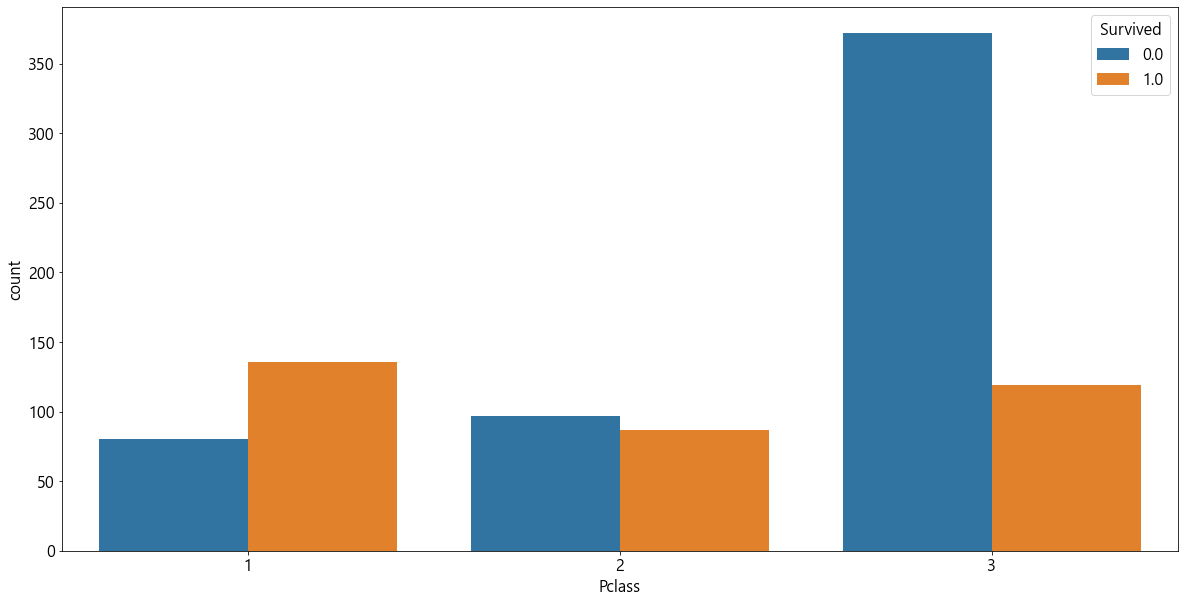

In [ ]:
# 결측치를 제외하고 데이터가 같은 것 끼리 그룹으로 묶어 그 수를 구해 그래프로
# 그린다.
# x = 수를 계산할 컬럼
# hue = 결과데이터 컬럼
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

### 정규식

- LastName 컬럼 추가

- 정규식 : 문자열의 양식을 지정할 때 사용하는 문자식
- ([A-Za-z]+) : 앞에서부터 대소문자 영문에 해당하는 것 까지만 해당
- 한글 : 가-힣
- 
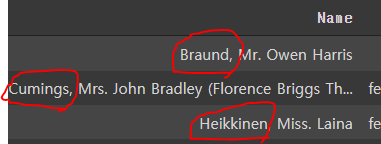

In [ ]:
data['LastName'] = 0

data['LastName'] = data['Name'].str.extract('([A-Za-z]+)')
data['LastName']

- 이름에서 이니셜을 추출한다.
- ([A-Za-z]+) \. : A-Za-z로 구성되어 있고 마지막이 . 으로  끝나는것

In [ ]:
data['Initial'] = 0
#  ([A-Za-z]+)\. : A-Za-z로 구성되어 있고 마지막이 . 으로  끝나는것
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial']

### lambda 인자 : 표현식
- 람다함수의 장점은 코드의 간결함 메모리의 절약
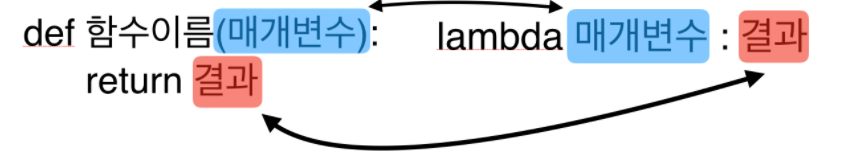
### lambda와 같이 쓰는 연산
- transform(): 각 원소를 살리고 그 안에 연산결과를 채운다.(평균값이 같으면 그대로 각각 같은값이 모든 행에 표시)
- apply(): 그룹별로 행당 한줄의 정리된 값으로 정리되어 출력.
- map() : 
- filter(): filter에 인자로 사용되는 function은 처리되는 각각의 요소에 대해 Boolean 값을 반환합니다.



In [ ]:
l = list(range(1,11))
print(l)
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 
m = list(map(lambda n:n*n, l))
print(m)
# [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
 
f = list(filter(lambda n:n%2==0, l))
print(f)
# [2, 4, 6, 8, 10]
 
r = reduce(lambda n,m:n*m, l)
print(r)
# 3628800


In [ ]:
# 이니셜별 나이의 평균을 구한다.
a1 = data.groupby('Initial')['Age']

# 결측치인 부분에 데이터를 담는다.
data['Age'] = a1.apply(lambda x : x.fillna(x.mean()))
data['Age'].isna().sum()

- 요금의 전체 평균을 구해서 결측치에 채워준다.
- fillna()

In [ ]:
a1 = data['Fare'].mean()

data['Fare'].fillna(a1, inplace=True)

data['Fare'].isna().sum()

- 결측치를 제일 많은 S로 채워준다.

In [ ]:
a1 = data.loc[data['Embarked'].isna()]
data.loc[a1.index, 'Embarked'] = 'S'
data['Embarked'].isna().sum()

### query
- 조건식을 문자열로 입력받아 해당 조건에 만족하는 행을 추출해 출력해주는 함수.
- 대괄호[]를 사용하여 조건식을 입력해도 되는데 굳이 query를 사용하는 이유는 방대한 양의 데이터를 처리할 경우 성능이 우수함.
- 즉 대용량 데이터를 처리할 경우 대괄호 보다 성능이 좋다.

#### 사용예
1) 비교 연산자( ==, >, >=, <, <=, != )

2) in 연산자( in, ==, not in, != )

3) 논리 연산자(and, or, not)

4) 외부 변수(또는 함수) 참조 연산

5) 인덱스 검색

6) 문자열 부분검색( str.contains, str.startswith, str.endswith )

​


In [ ]:
# 1등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 1')
# 확인한다.
a1['Cabin2'].value_counts()

 ### 원본 유지를 위해 데이터 프레임을 복제한다.

In [ ]:
df1 = data.copy()
df1

### 불필요한 컬럼 제거

In [ ]:

drop_list = ['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Cabin']

df1.drop(drop_list, axis=1, inplace=True)

### 문자열을 숫자로 변환한다.
- 만약 변환 된 것을 나중에 복원해야 할 경우 LabelEncoder를 사용한다
- 특히 결과 데이터가 문자열일 경우 나중에 예측 결과를 문자열로 복원해야기 때문에 받드시 LabelEncoder 를 사용해야 한다.
- 하지만 입력데이터는 복원할 일이 없기 때문에 pandas가 제공하는 factorize 함수를 사용하는것이 편하다

In [ ]:
df1['Sex'] = df1['Sex'].factorize()[0]

### 생존 비율을 확인한다.
- groupby(..)[..].mean()

In [ ]:
temp.groupby('Pclass')['Survived'].mean()

- Pclass 값을 생존률로 변경한다.
- transform()

In [ ]:
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')

In [ ]:
# 생존률을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = 0
# 최대
temp['Max'] = 0
# 최소
temp['Min'] = 0
# 개인관련
temp['Social'] = 0
# 탑승정보
temp['Wealth'] = 0
# 최대 - 최소
temp['Diff'] = 0

In [ ]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Social'] = (temp['Initial'] + temp['Sex'] + temp['Age'] + temp['FamilySize']) / 4
temp['Wealth'] = (temp['Pclass'] + temp['Ticket'] + temp['Fare'] + temp['Cabin2']) / 4
temp['Diff'] = temp['Max'] - temp['Min']
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived,Mean,Max,Min,Social,Wealth,Diff
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [ ]:
# 구한 통계값들을 원본에 담아준다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Social'] = temp['Social']
df1['Wealth'] = temp['Wealth']
df1['Diff'] = temp['Diff']
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,1,1,39.000000,273,108.9000,1,851,17,1,1,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,3,0,38.500000,927,7.2500,0,852,0,0,1,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,3,0,32.252151,928,8.0500,0,799,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009


#### 데이터 준비>데이터 전처리(X,y-인코딩( LabelEncoder())-표준화(StandardScaler()))

#### 기본 모델 사용하기> 사용할 알고리즘 리스트에 담기 > 교차검증 >시각화 하이퍼 파라미터 튜닝> 시각화>전체 데이터를 학습과 검증으로 나눠 최종 평가> 각 모델에서 하이퍼 파라미터가 튜닝된 모델을 추출>추출된 모델로 학습>결과 예측

# 당뇨병

- 대체할 데이터의 index를 가져와서 loc로 대체하는 방법

In [ ]:
# 전체 Glucose의 평균을 구한다.
a1 = data['Glucose'].mean()

# Glucose가 0인 사람들의 index를 가져온다.
idx = data.query('Glucose == 0').index

# 평균으로 채워준다.
data.loc[idx, 'Glucose'] = a1

data['Glucose'].value_counts().sort_index()

### 원본 유지를 위해 데이터 프레임을 복제한다.

In [ ]:
df1 = data.copy()
df1

### 전처리 temp.groupby('Age')[' '].transform('mean')
- Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,Age
- 당뇨 양성율로 변경한다.

In [ ]:
# 양성율을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = 0
# 최대
temp['Max'] = 0
# 최소
temp['Min'] = 0
# 최대 - 최소
temp['Diff'] = 0

In [ ]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Diff'] = temp['Max'] - temp['Min']
temp

In [ ]:
# 구한 통계값들을 원본에 담아준다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Diff'] = temp['Diff']
df1

#### 데이터 준비>데이터 전처리(X,y-인코딩( LabelEncoder())-표준화(StandardScaler()))

#### 기본 모델 사용하기> 사용할 알고리즘 리스트에 담기 > 교차검증 >시각화 하이퍼 파라미터 튜닝> 시각화>전체 데이터를 학습과 검증으로 나눠 최종 평가> 각 모델에서 하이퍼 파라미터가 튜닝된 모델을 추출>추출된 모델로 학습>결과 예측